## 03 - Cálculo de las Anomalías de Temperatura a Diferentes Profundidades


In [1]:
# Librerías para el tratamiento de datos
import numpy as np
import pandas as pd

# Librerías para la visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

### Definir las Funciones

In [2]:
# Función para calcular el número de datos a partir de una profundidad
#======================================================================
def mayor(depth):
    mayor = 0
    for i in zj:
        if(i>depth):
            mayor+= 1
    return mayor

In [3]:
# Plot de la regresión lineal
#============================================================================================================
def plot_regresion(zj,Tj,T_steady,nombre):
    plt.figure(figsize=(3, 5))
    plt.xlabel("Temperaturas (°C)")
    plt.ylabel("Profundidad (m)") 
    plt.gca().invert_yaxis()
    plt.title(f"Regresión lineal del borehole {nombre} en Chile\n")

    plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = False
    plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True

    plt.scatter(Tj, zj, edgecolor='black', facecolor='white',alpha=0.5,linewidths=1.0, label='Sample Data')
    plt.plot(T_steady,zj,"tomato",label="Regresión Lineal")

    plt.legend(loc = "best")

# Plot de las anomalías 
#===============================================================================================================
def plot_anomalias(Tt,zj,nombre):
    
    plt.figure(figsize=(3, 5))
    plt.xlim(-1,2)
    plt.ylim(0,zj[len(zj)-1])

    plt.xlabel("Anomalías (°C)")
    plt.ylabel("Profundidad (m)") 
    plt.gca().invert_yaxis()
    plt.title(f"Anomalias de temperatura del borehole {nombre} en Chile \n")
    
    plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = False
    plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True

    plt.plot (Tt,zj,sns.color_palette('Set2')[0])

# Regresión lineal con numpy
#================================================================================================================
def linear_regression(zj,Tj,depth):

    zj_red = zj [len(zj)-mayor(depth):] #y
    Tj_red = Tj [len(zj)-mayor(depth):] #x

    #Linear regression L2
    model = np.polyfit(zj_red,Tj_red,1)

    # y = a*x + b

    a = model[0]
    b = model[1]
    print("To:",b)
    print("Inclinación de la recta gamma_o:",a)

    T_steady = b + a*zj
    
    # Cálculo de las anomalías
    Tt = Tj-T_steady 
    
    return T_steady,Tt

### 03.1 - ALA1110-2

To: 23.406444141120343
Inclinación de la recta gamma_o: 0.006779432966319873


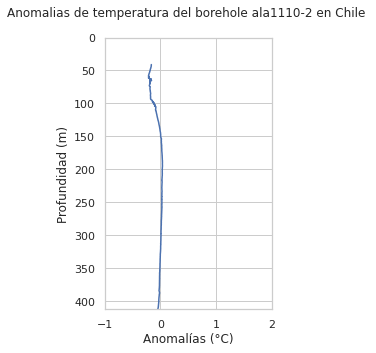

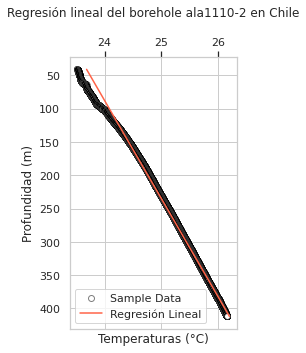

In [4]:
nombre = "ala1110-2"
ala1110 = "../boreholes/ala1110-2.dat"

zj,Tj = np.loadtxt (ala1110,skiprows = 5,unpack = True)
T_steady,Tt = linear_regression(zj,Tj,100)
plot_anomalias(Tt,zj,nombre)
plot_regresion(zj,Tj,T_steady,nombre)

df= pd.DataFrame({"Anomalías":Tt}).transpose()
df.to_csv(f"../resultados/anomalias_{nombre}.csv",index=False)

In [5]:
# Voy a probar a hacer con 50 profundidades diferntes

#Creo un dataframe vacio
anomalias_tt=[]
zj_total=[]
prof_total=[]
T_steady_total=[]

for i in range(50,150,10):
    T_steady_rep,Tt_hue = linear_regression(zj,Tj,depth=i)
    for j in range(len(Tt_hue)):
        T_steady_total.append(T_steady_rep[j])
        anomalias_tt.append(Tt_hue[j])
        zj_total.append(zj[j])
        prof_total.append(i)

To: 23.296971825973408
Inclinación de la recta gamma_o: 0.007142612671640527
To: 23.31351000234486
Inclinación de la recta gamma_o: 0.007086356053152468
To: 23.33155259105033
Inclinación de la recta gamma_o: 0.007025659082478403
To: 23.353907963923323
Inclinación de la recta gamma_o: 0.006951301478836853
To: 23.379652633842735
Inclinación de la recta gamma_o: 0.006866624083596606
To: 23.406444141120343
Inclinación de la recta gamma_o: 0.006779432966319873
To: 23.426468329148285
Inclinación de la recta gamma_o: 0.006714981100922875
To: 23.445196057905253
Inclinación de la recta gamma_o: 0.0066553410850400405
To: 23.460993703739312
Inclinación de la recta gamma_o: 0.006605569641994454
To: 23.474143904448127
Inclinación de la recta gamma_o: 0.006564569946638586


In [6]:
# Guardamos los datos obtenidos
df = pd.DataFrame(data={"profundidad_elegida":prof_total,"Profundidad (m)":zj_total,"Anomalías (°C)":anomalias_tt})

<AxesSubplot:xlabel='Profundidad (m)', ylabel='Anomalías (°C)'>

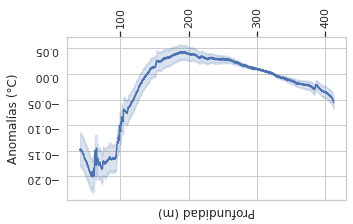

In [7]:
# Plot de las anomalías con el intervalo de confianza del 95%
plt.figure(figsize=(5, 3))

plt.xticks(rotation=90)
plt.yticks(rotation=180)
plt.xlabel("Profundidad (m)",rotation=180)
sns.lineplot(data=df,y="Anomalías (°C)",x="Profundidad (m)",estimator="mean",ci = 95)

In [8]:
df_2 = pd.DataFrame(data={"profundidad_elegida":prof_total,"profundidad":zj_total,"steady":T_steady_total})

<AxesSubplot:title={'center':'Regresión lineal del borehole ala1110-2 en Chile\n'}, xlabel='Temperaturas (°C)', ylabel='Profundidad (m)'>

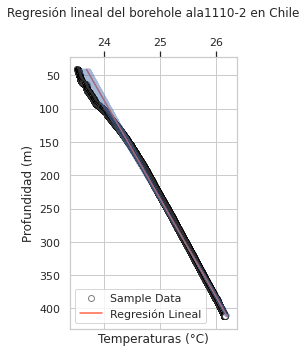

In [9]:
# Plot de la regresión y su intervalo del 95% de confianza
plot_regresion(zj,Tj,T_steady,nombre)
sns.lineplot(data=df_2,x="steady",y="profundidad",alpha=0.5,palette=sns.color_palette('Set2')[1])

### 03.2 - 1501

To: 22.585026871145164
Inclinación de la recta gamma_o: 0.013661901249011099


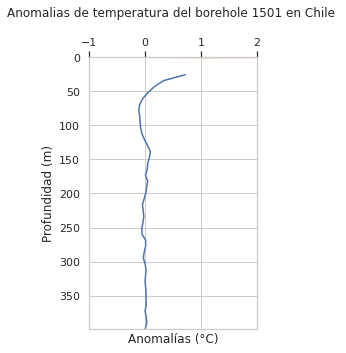

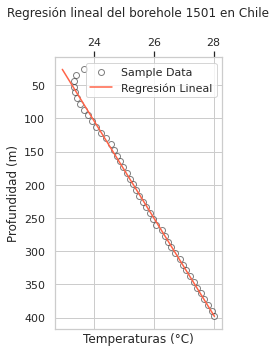

In [10]:
path = "../boreholes/1501.dat"
nombre = "1501"
zj,Tj = np.loadtxt (path,skiprows = 5,unpack = True)
T_steady,Tt = linear_regression(zj,Tj,100)
plot_anomalias(Tt,zj,nombre)
plot_regresion(zj,Tj,T_steady,nombre)

df= pd.DataFrame({"Anomalías":Tt}).transpose()
df.to_csv(f"../resultados/anomalias_{nombre}.csv",index=False,sep=",")


In [11]:
# Voy a hacer lo mismo aqui con las diferentes profundidades

anomalias_tt=[]
zj_total=[]
prof_total=[]
T_steady_total=[]

for i in range(50,151,10):
    T_steady_rep,Tt_hue = linear_regression(zj,Tj,depth=i)
    for j in range(len(Tt_hue)):
        T_steady_total.append(T_steady_rep[j])
        anomalias_tt.append(Tt_hue[j])
        zj_total.append(zj[j])
        prof_total.append(i)
    
print(len(prof_total),len(anomalias_tt),len(zj_total))

To: 22.54582627875891
Inclinación de la recta gamma_o: 0.01379286051426695
To: 22.535102463195816
Inclinación de la recta gamma_o: 0.013830384137252892
To: 22.544077220212458
Inclinación de la recta gamma_o: 0.013799589185827755
To: 22.55735632555307
Inclinación de la recta gamma_o: 0.01375449097976115
To: 22.570431305818563
Inclinación de la recta gamma_o: 0.013710517134919796
To: 22.585026871145164
Inclinación de la recta gamma_o: 0.013661901249011099
To: 22.60046024580628
Inclinación de la recta gamma_o: 0.013610984317691545
To: 22.614119344948058
Inclinación de la recta gamma_o: 0.013566346103140935
To: 22.6154003142004
Inclinación de la recta gamma_o: 0.013562042805473226
To: 22.596613231007474
Inclinación de la recta gamma_o: 0.01362174956271102
To: 22.578084475860344
Inclinación de la recta gamma_o: 0.013680100008520294
484 484 484


In [12]:
df = pd.DataFrame(data={"profundidad_elegida":prof_total,"Profundidad (m)":zj_total,"Anomalías (°C)":anomalias_tt})
df_2 = pd.DataFrame(data={"profundidad_elegida":prof_total,"profundidad":zj_total,"steady":T_steady_total})

<AxesSubplot:xlabel='Profundidad (m)', ylabel='Anomalías (°C)'>

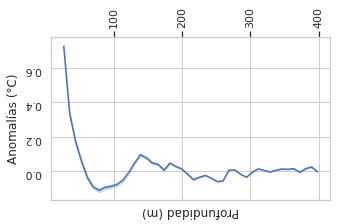

In [13]:
plt.figure(figsize=(5, 3))
plt.xticks(rotation=90)
plt.yticks(rotation=180)
plt.xlabel("Profundidad (m)",rotation=180)

sns.lineplot(data=df,y="Anomalías (°C)",x="Profundidad (m)",estimator="mean",ci = 95)

In [14]:
df_2 = pd.DataFrame(data={"profundidad_elegida":prof_total,"profundidad":zj_total,"steady":T_steady_total})

<AxesSubplot:title={'center':'Regresión lineal del borehole 1501 en Chile\n'}, xlabel='Temperaturas (°C)', ylabel='Profundidad (m)'>

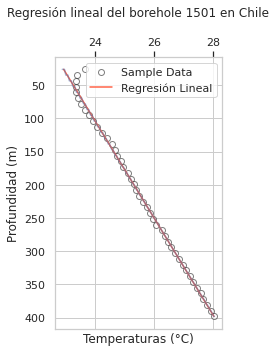

In [15]:
# Plot de la regresión y su intervalo del 95% de confianza
plot_regresion(zj,Tj,T_steady,nombre)
sns.lineplot(data=df_2,x="steady",y="profundidad",alpha=0.5,palette=sns.color_palette('Set2')[1])

### 03.3 - 1504

To: 22.52726101056147
Inclinación de la recta gamma_o: 0.013583938828021308


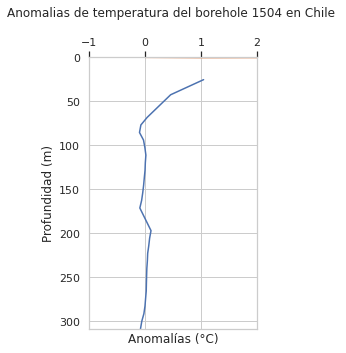

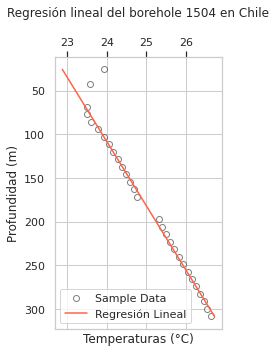

In [16]:
path = "../boreholes/1504.dat"
nombre = "1504"
zj,Tj = np.loadtxt (path,skiprows = 5,unpack = True)
T_steady,Tt = linear_regression(zj,Tj,100)
plot_anomalias(Tt,zj,nombre)
plot_regresion(zj,Tj,T_steady,nombre)

df= pd.DataFrame({"Anomalías":Tt}).transpose()
df.to_csv(f"../resultados/anomalias_{nombre}.csv",index=False,sep=",")

### 03.4 - 1505

To: 22.47693663777968
Inclinación de la recta gamma_o: 0.014213182004974397


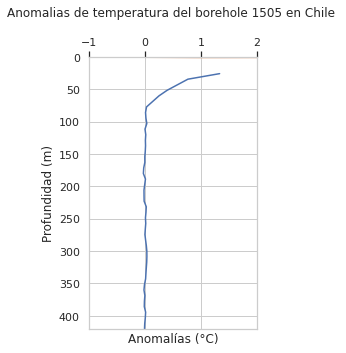

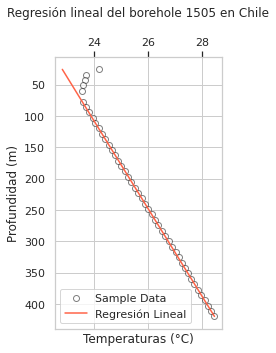

In [17]:
path = "../boreholes/1505.dat"
nombre = "1505"
zj,Tj = np.loadtxt (path,skiprows = 5,unpack = True)
T_steady,Tt = linear_regression(zj,Tj,100)
plot_anomalias(Tt,zj,nombre)
plot_regresion(zj,Tj,T_steady,nombre)

df= pd.DataFrame({"Anomalías":Tt}).transpose()
df.to_csv(f"../resultados/anomalias_{nombre}.csv",index=False,sep=",")

### 03.5 - DDH2457

To: 22.36062393464047
Inclinación de la recta gamma_o: 0.013127402618258552


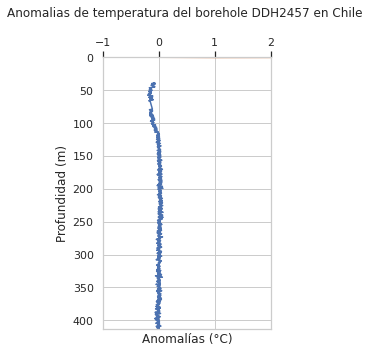

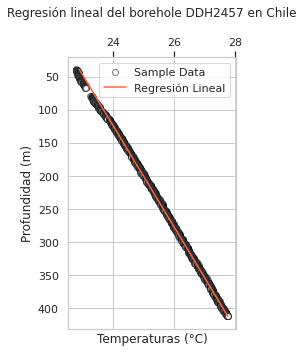

In [18]:
nombre = "DDH2457"
path = f"../boreholes/{nombre}.dat"

zj,Tj = np.loadtxt (path,skiprows = 5,unpack = True)
T_steady,Tt = linear_regression(zj,Tj,100)
plot_anomalias(Tt,zj,nombre)
plot_regresion(zj,Tj,T_steady,nombre)

df= pd.DataFrame({"Anomalías":Tt}).transpose()
df.to_csv(f"../resultados/anomalias_{nombre}.csv",index=False,sep=",")